In [183]:
import pandas as pd
import pandas_ta as ta
from dateutil import parser
from datetime import datetime, timedelta, timezone, tzinfo
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [184]:
stock_data = pd.read_csv('./4816.T.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5417 entries, 0 to 5416
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5417 non-null   object 
 1   Open       5417 non-null   float64
 2   High       5417 non-null   float64
 3   Low        5417 non-null   float64
 4   Close      5417 non-null   float64
 5   Adj Close  5417 non-null   float64
 6   Volume     5417 non-null   int64  
 7   timestamp  5417 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 338.7+ KB


<AxesSubplot:xlabel='timestamp'>

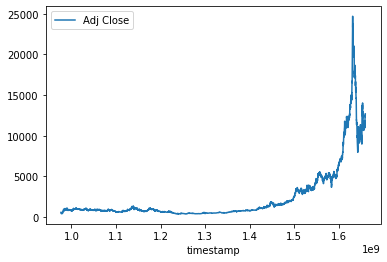

In [185]:
def formatJST(day):
    dt = parser.parse(day + " 15:00 JST", tzinfos={"JST":9*3600})
    return int(datetime.timestamp(dt))


stock_data['timestamp'] =  list(map(formatJST, list(stock_data['Date'])))
stock_data.sort_values(by=['timestamp'])
stock_data.info()
stock_data.plot(x="timestamp", y="Adj Close")

In [186]:
stock_data["shifted_adj_close"] = stock_data["Adj Close"].shift(1)
stock_data["shifted_adj_close"][0] = stock_data["Adj Close"][0]

/var/folders/vz/wcr8_9tj1bvb6_3yp7t72tx00000gn/T/ipykernel_10094/2461807197.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["shifted_adj_close"][0] = stock_data["Adj Close"][0]


In [193]:
stock_data["Adj Close Returns"] = stock_data["shifted_adj_close"] / stock_data["Adj Close"]

In [194]:
CustomStrategy = ta.Strategy(
    name="Macd",
    ta=[
        {"kind": "sma", "length": 50},
        {"kind": "macd", "fast": 8, "slow": 21},
#         {"kind": "sma", "close": "volume", "length": 20, "prefix": "VOLUME"},
    ]
)
stock_data.ta.strategy(CustomStrategy)


In [195]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,timestamp,shifted_adj_close,Adj Close Returns,SMA_50,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9
0,2000-12-08,666.666687,715.000000,633.333313,680.000000,562.626587,6696000,976255200,562.626587,1.000000,NaN,NaN,NaN,NaN
1,2000-12-11,675.000000,680.000000,580.000000,580.000000,479.887451,1272000,976514400,562.626587,1.172414,NaN,NaN,NaN,NaN
2,2000-12-12,575.000000,621.666687,571.666687,591.666687,489.540344,1068000,976600800,479.887451,0.980282,NaN,NaN,NaN,NaN
3,2000-12-13,586.666687,608.333313,541.666687,566.666687,468.855591,552000,976687200,489.540344,1.044118,NaN,NaN,NaN,NaN
4,2000-12-14,561.666687,563.333313,541.666687,558.333313,461.960663,330000,976773600,468.855591,1.014925,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='timestamp'>

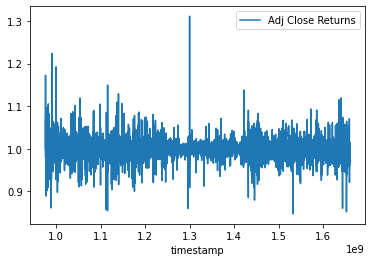

In [190]:
stock_data.plot(y="Adj Close Returns")

<AxesSubplot:>

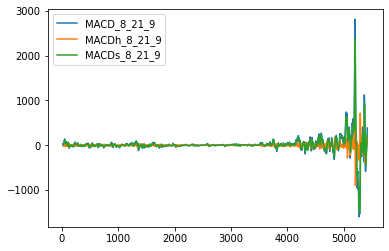

In [198]:
stock_data.plot(y=["MACD_8_21_9","MACDh_8_21_9", "MACDs_8_21_9"])

<AxesSubplot:xlabel='timestamp'>

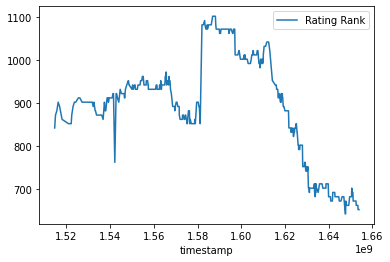

In [199]:
op_data = pd.read_csv('./one_piece_stats.csv')
def format(day):
    day = day[:day.rindex(" (")]
    dt = parser.parse(day)
    return int(datetime.timestamp(dt))

op_data['timestamp'] =  list(map(format, list(op_data['Date'])))

op_data["Members"] = op_data["Members"].str.replace(',', '').astype(int)
op_data["Scored by"] = op_data["Scored by"].str.replace(',', '').astype(int)
op_data.plot(x="timestamp", y="Rating Rank")

In [200]:
op_data.head()

,Score,Scored by,Popularity Rank,Rating Rank,Members,Date,timestamp
0,8.55,389305,32,842,653763,Sat Dec 30 2017 13:55:07 GMT-0500 (Eastern Sta...,1514624107
1,8.54,390598,32,872,656161,Thu Jan 04 2018 01:00:54 GMT-0500 (Eastern Sta...,1515009654
2,8.54,392776,32,882,660222,Thu Jan 11 2018 01:33:03 GMT-0500 (Eastern Sta...,1515616383
3,8.54,394764,32,902,663864,Thu Jan 18 2018 02:15:08 GMT-0500 (Eastern Sta...,1516223708
4,8.54,396607,32,892,667388,Thu Jan 25 2018 16:09:50 GMT-0500 (Eastern Sta...,1516878590


In [201]:
# j=0
# good_indices = []
# stock_offset = 0
# aligned_scores = []
# ended = -1
# for i in range(len(stock_data["timestamp"])):
#     cur_time = stock_data["timestamp"][i]
#     prev_time = cur_time-86400

#     while cur_time>op_data["timestamp"][j]:
#         j+=1
#         if j==len(op_data["timestamp"]):
#             ended = i                
#             break
    
#     if ended>0:
#         print("broke at", i)
#         break

#     if j==0:
#         stock_offset = i
#         continue

#     op_time = op_data["timestamp"][j-1]

#     aligned_scores.append(op_data["Rating Rank"][j-1])
#     good_indices.append(j-1)


# print(len(aligned_scores))

# sliced_data = stock_data[stock_offset+1:ended]
# sliced_data["Rank"]=aligned_scores
# sliced_data.head()


In [202]:
stock_data["Day Delta"] = stock_data["timestamp"].diff().shift(-1).to_numpy() / 86400
stock_data.at[len(stock_data)-1, "Day Delta"]= 1

In [203]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,timestamp,shifted_adj_close,Adj Close Returns,SMA_50,MACD_8_21_9,MACDh_8_21_9,MACDs_8_21_9,Day Delta
0,2000-12-08,666.666687,715.000000,633.333313,680.000000,562.626587,6696000,976255200,562.626587,1.000000,NaN,NaN,NaN,NaN,3.0
1,2000-12-11,675.000000,680.000000,580.000000,580.000000,479.887451,1272000,976514400,562.626587,1.172414,NaN,NaN,NaN,NaN,1.0
2,2000-12-12,575.000000,621.666687,571.666687,591.666687,489.540344,1068000,976600800,479.887451,0.980282,NaN,NaN,NaN,NaN,1.0
3,2000-12-13,586.666687,608.333313,541.666687,566.666687,468.855591,552000,976687200,489.540344,1.044118,NaN,NaN,NaN,NaN,1.0
4,2000-12-14,561.666687,563.333313,541.666687,558.333313,461.960663,330000,976773600,468.855591,1.014925,NaN,NaN,NaN,NaN,1.0


In [204]:
stock_data.to_csv("processed_data.csv", index=False)